# 4. MACHINE LEARNING MODEL
---

### 4.0. Import libraries and clean dataset

In [4]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# DATASETS
early_train_data = pd.read_csv(r'..\data\interim\early_x_train.csv')
early_test_data = pd.read_csv(r'..\data\interim\early_x_test.csv')
sel_train_data = pd.read_csv(r'..\data\processed\x_train.csv')
sel_test_data = pd.read_csv(r'..\data\processed\x_test.csv')
target = 'ObesityCategory'

# Early Dataset
X_early_train = early_train_data.drop([target], axis=1)
y_early_train = early_train_data[target]
X_early_test = early_test_data.drop([target], axis=1)
y_early_test = early_test_data[target]

# Selected Dataset
X_sel_train = sel_train_data.drop([target], axis=1)
y_sel_train = sel_train_data[target]
X_sel_test = sel_test_data.drop([target], axis=1)
y_sel_test = sel_test_data[target]

### 1.1. Creating a model comparison for all datasets

In [5]:
# Dictionary to store datasets
datasets = {
    'early': {'X_train': X_early_train, 'y_train': y_early_train, 'X_test': X_early_test, 'y_test': y_early_test},
    'sel': {'X_train': X_sel_train, 'y_train': y_sel_train, 'X_test': X_sel_test, 'y_test': y_sel_test}
}

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Loop over datasets
for dataset_name, data in datasets.items():
    X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']  
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Additional code for evaluation or other tasks
    # Print the dataset name
    print(f"Model fitted for {dataset_name} dataset has a total score of {round(accuracy_score(y_test, y_pred),3)}.")

Model fitted for early dataset has a total score of 1.0.
Model fitted for sel dataset has a total score of 1.0.


It is possible to see that the both datasets provides a perfect score (1.0). Due to this, the Selected Dataset will be used. This decision will allow the model to obtain the same results with less information, improving its performance.

In [6]:
# REPLACING THE VARIABLES
X_train = X_sel_train 
y_train = y_sel_train 
X_test = X_sel_test
y_test = y_sel_test

# model initialization and training 
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 1.2. model graph

In [8]:
X_train.columns

Index(['Height', 'Weight', 'BMI'], dtype='object')

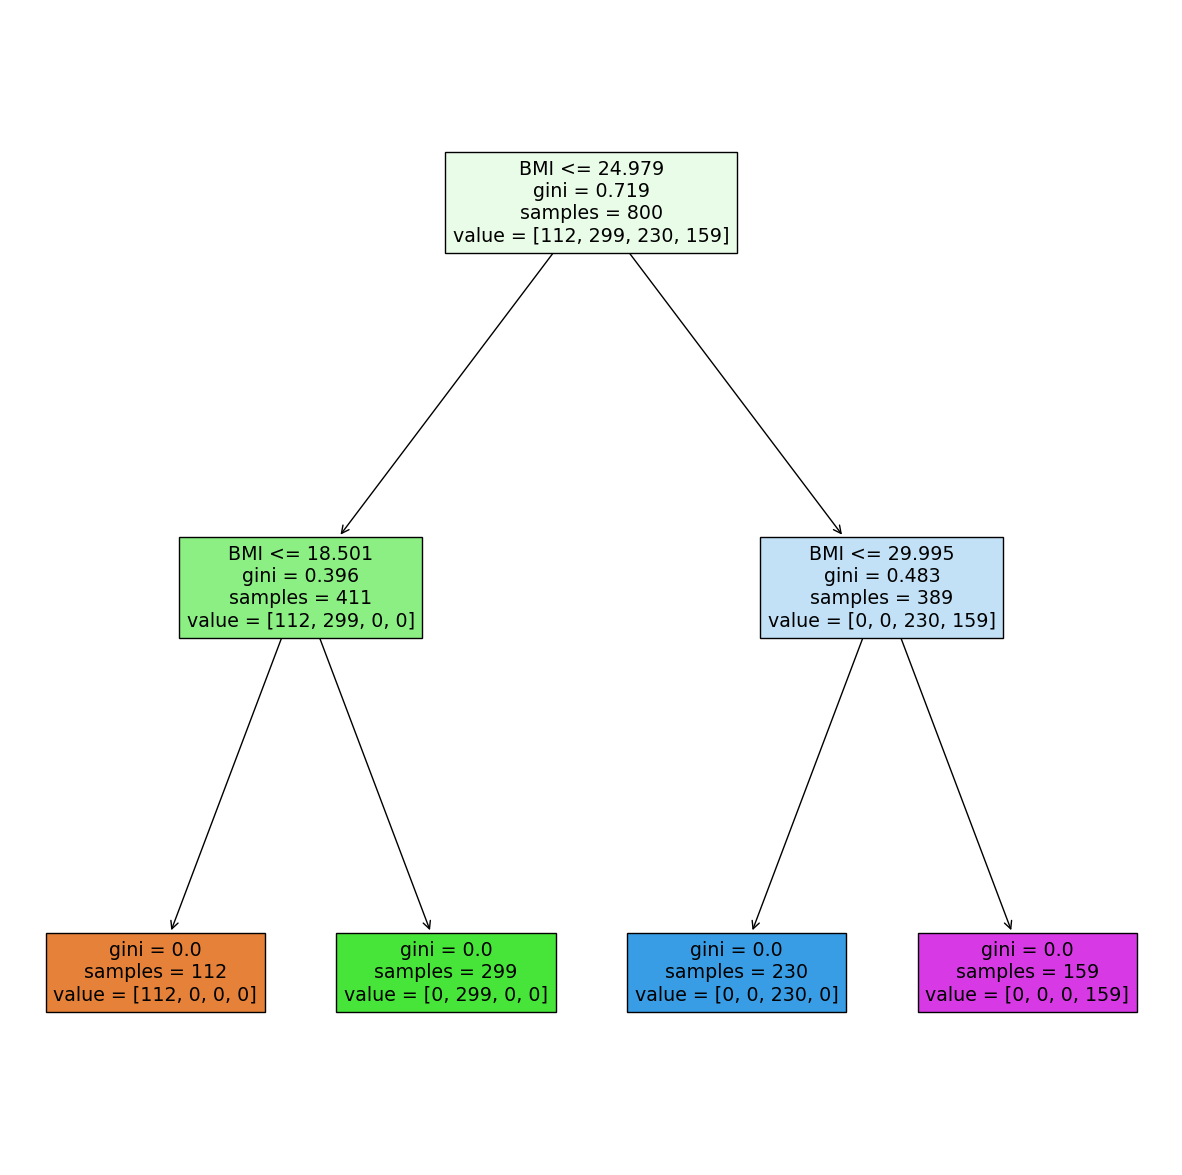

In [11]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)
plt.show()

### 1.3. model prediction and score

In [12]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### 1.4. model optimization

Since the original model provides a score of 1.0, there is no need for optimization.

### 1.6. saving the model

In [15]:
from pickle import dump
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-8_minleaf-2_minsplit11_42.sav", "wb"))


---
## CONCLUSIONS

- The model provided a score of 1.0 using both dataset (original and feature-selected)
